In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [15]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt

from nltk.corpus import stopwords
from sklearn.metrics.pairwise import linear_kernel
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.tokenize import RegexpTokenizer
import re
import string
import random

In [3]:
data = pd.read_csv('/content/drive/MyDrive/ml/RecommendationSystem/News_Dataset_18-9-20.csv')
data.shape

(2190, 9)

In [4]:
data.head()

,Unnamed: 0,Unnamed: 0.1,link,text,title,date,keywords,summary,title_summary
0,0,0,http://techcrunch.com/2020/09/07/vodafone-idea...,"Vodafone Idea, one of the largest telecom oper...",Indian telecom giant Vodafone Idea rebrands as...,2020-09-07 00:00:00,"['rebrands', 'idea', 'vi', 'giant', 'brand', '...","Vodafone Idea, one of the largest telecom oper...",Indian telecom giant Vodafone Idea rebrands as...
1,1,1,http://techcrunch.com/2020/09/16/facebook-addr...,"At the beginning of the previous decade, Faceb...",Facebook addresses political controversy in In...,2020-09-16 00:00:00,"['opportunities', 'whatsapp', 'controversy', '...",Politicians in the country today heavily rely ...,Facebook addresses political controversy in In...
2,2,2,http://techcrunch.com/2020/09/14/youtube-launc...,"As TikTok’s fate in the U.S. remains murky, Yo...","YouTube launches its TikTok rival, YouTube Sho...",2020-09-14 00:00:00,"['rival', 'video', 'feature', 'access', 'youtu...","As TikTok’s fate in the U.S. remains murky, Yo...","YouTube launches its TikTok rival, YouTube Sho..."
3,3,3,http://techcrunch.com/2020/09/09/groww-an-inve...,Even as more than 150 million people are using...,"Groww, an investment app for millennials in In...",2020-09-09 00:00:00,"['world', 'yc', 'continuity', 'stocks', 'groww...","YC Continuity, the growth-stage investment fun...","Groww, an investment app for millennials in In..."
4,4,4,http://techcrunch.com/2020/09/15/lanzatech-is-...,As part of the continuing global rollout of La...,LanzaTech is developing a small-scale waste bi...,2020-09-15 00:00:00,"['production', 'distributed', 'developing', 's...",As part of the continuing global rollout of La...,LanzaTech is developing a small-scale waste bi...


In [5]:
data = data.drop_duplicates(subset=None, keep='first', inplace=False)

In [6]:
data.shape

(2190, 9)

In [7]:
data.insert(0,'id',range(0,data.shape[0]))
data

,id,Unnamed: 0,Unnamed: 0.1,link,text,title,date,keywords,summary,title_summary
0,0,0,0,http://techcrunch.com/2020/09/07/vodafone-idea...,"Vodafone Idea, one of the largest telecom oper...",Indian telecom giant Vodafone Idea rebrands as...,2020-09-07 00:00:00,"['rebrands', 'idea', 'vi', 'giant', 'brand', '...","Vodafone Idea, one of the largest telecom oper...",Indian telecom giant Vodafone Idea rebrands as...
1,1,1,1,http://techcrunch.com/2020/09/16/facebook-addr...,"At the beginning of the previous decade, Faceb...",Facebook addresses political controversy in In...,2020-09-16 00:00:00,"['opportunities', 'whatsapp', 'controversy', '...",Politicians in the country today heavily rely ...,Facebook addresses political controversy in In...
2,2,2,2,http://techcrunch.com/2020/09/14/youtube-launc...,"As TikTok’s fate in the U.S. remains murky, Yo...","YouTube launches its TikTok rival, YouTube Sho...",2020-09-14 00:00:00,"['rival', 'video', 'feature', 'access', 'youtu...","As TikTok’s fate in the U.S. remains murky, Yo...","YouTube launches its TikTok rival, YouTube Sho..."
3,3,3,3,http://techcrunch.com/2020/09/09/groww-an-inve...,Even as more than 150 million people are using...,"Groww, an investment app for millennials in In...",2020-09-09 00:00:00,"['world', 'yc', 'continuity', 'stocks', 'groww...","YC Continuity, the growth-stage investment fun...","Groww, an investment app for millennials in In..."
4,4,4,4,http://techcrunch.com/2020/09/15/lanzatech-is-...,As part of the continuing global rollout of La...,LanzaTech is developing a small-scale waste bi...,2020-09-15 00:00:00,"['production', 'distributed', 'developing', 's...",As part of the continuing global rollout of La...,LanzaTech is developing a small-scale waste bi...
...,...,...,...,...,...,...,...,...,...,...
2185,2185,1285,1285,https://uk.reuters.com/article/uk-brazil-econo...,BRASILIA (Reuters) - Paulo Guedes has faced hi...,Brazil's Guedes finds influence waning as Bols...,2020-09-16 18:18:18+00:00,"['bolsonaro', 'guedes', 'reins', 'economic', '...",FILE PHOTO: Brazil's Economy Minister Paulo Gu...,Brazil's Guedes finds influence waning as Bols...
2186,2186,1286,1286,https://www.reuters.com/article/us-britain-boe...,LONDON (Reuters) - The Bank of England is expe...,Bank of England gears up for next stimulus push,2020-09-16 23:07:30+00:00,"['push', 'bank', 'england', 'zero', 'signal', ...",LONDON (Reuters) - The Bank of England is expe...,Bank of England gears up for next stimulus pus...
2187,2187,1287,1287,https://www.reuters.com/article/syria-crisis-f...,AMMAN (Reuters) - Syria is experiencing worsen...,Syria says U.S. sanctions behind acute fuel cr...,2020-09-16 23:25:09+00:00,"['shortages', 'imports', 'gasoline', 'shipment...",AMMAN (Reuters) - Syria is experiencing worsen...,Syria says U.S. sanctions behind acute fuel cr...
2188,2188,1288,1288,https://af.reuters.com/article/uk-iran-usa-wor...,Curiosity high for TV's anything-can-happen vi...,"Business & Financial News, U.S & International...",NaN,"['international', 'tvs', 'sundays', 'united', ...",Curiosity high for TV's anything-can-happen vi...,"Business & Financial News, U.S & International..."


In [8]:
ds = data[['date','title','text','link']]

In [9]:
ds.shape

(2190, 4)

In [10]:
ds = ds.dropna()

In [11]:
ds = ds.drop_duplicates(subset=None, keep='first', inplace=False)

In [12]:
ds.insert(0,'id',range(0,ds.shape[0]))

In [13]:
ds.shape

(1496, 5)

In [14]:
ds.head()

,id,date,title,text,link
0,0,2020-09-07 00:00:00,Indian telecom giant Vodafone Idea rebrands as...,"Vodafone Idea, one of the largest telecom oper...",http://techcrunch.com/2020/09/07/vodafone-idea...
1,1,2020-09-16 00:00:00,Facebook addresses political controversy in In...,"At the beginning of the previous decade, Faceb...",http://techcrunch.com/2020/09/16/facebook-addr...
2,2,2020-09-14 00:00:00,"YouTube launches its TikTok rival, YouTube Sho...","As TikTok’s fate in the U.S. remains murky, Yo...",http://techcrunch.com/2020/09/14/youtube-launc...
3,3,2020-09-09 00:00:00,"Groww, an investment app for millennials in In...",Even as more than 150 million people are using...,http://techcrunch.com/2020/09/09/groww-an-inve...
4,4,2020-09-15 00:00:00,LanzaTech is developing a small-scale waste bi...,As part of the continuing global rollout of La...,http://techcrunch.com/2020/09/15/lanzatech-is-...


#Clean data

In [18]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [19]:
# Function for removing NonAscii characters
#def _removeNonAscii(s):
#    return "".join(i for i in s if  ord(i)<128)

# Function for converting into lower case
def make_lower_case(text):
    return text.lower()

# Function for removing stop words
def remove_stop_words(text):
    text = text.split()
    stops = set(stopwords.words("english"))
    text = [w for w in text if not w in stops]
    texts = [w for w in text if w.isalpha()]
    texts = " ".join(texts)
    return texts

# Function for removing punctuation
def remove_punctuation(text):
    tokenizer = RegexpTokenizer(r'\w+')
    text = tokenizer.tokenize(text)
    text = " ".join(text)
    return text

# Function for removing the html tags
def remove_html(text):
    html_pattern = re.compile('<.*?>')
    return html_pattern.sub(r'', text)

# Applying all the functions in description and storing as a cleaned_desc
#ds['cleaned_desc'] = ds['text'].apply(_removeNonAscii)
ds['cleaned_desc'] = ds['text'].apply(func = make_lower_case)
ds['cleaned_desc'] = ds.cleaned_desc.apply(func = remove_stop_words)
ds['cleaned_desc'] = ds.cleaned_desc.apply(func=remove_punctuation)
ds['cleaned_desc'] = ds.cleaned_desc.apply(func=remove_html)

#  TF-IDF encoding

In [32]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel

## analyzer -- to select individual words# default 
## max_df[0.0,1.0] - used to ignore words with frequency more than 0.8 these words can be useless words as these words may appear only once and may not have a significant meaning
## min_df -- similar reason as the above one. 
## use_idfbool, default=True  -- Enable inverse-document-frequency reweighting.

tf = TfidfVectorizer(analyzer='word',stop_words='english',max_df=0.8,min_df=0.0,use_idf=True,ngram_range=(1,3))
tfidf_matrix = tf.fit_transform(ds['cleaned_desc'])

In [33]:
#This is how a tfidf vector looks like.
pd.DataFrame(tfidf_matrix.toarray(), columns=tf.get_feature_names())

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,aa,aa batteries,aa batteries set,aa lithium,aa lithium later,aaa,aaa affirmed,aaa affirmed shubhshree,aaa titles,aaa titles hard,...,zwift prides,zwift prides ability,zwift raised,zwift raised million,𝗺𝗼𝗻𝘁𝗵,𝗺𝗼𝗻𝘁𝗵 pandemic,𝗺𝗼𝗻𝘁𝗵 pandemic sustain,𝗽𝗲𝗿,𝗽𝗲𝗿 𝗺𝗼𝗻𝘁𝗵,𝗽𝗲𝗿 𝗺𝗼𝗻𝘁𝗵 pandemic
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1491,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1492,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1493,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1494,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Vector Space Model
In this model, each item is stored as a vector of its attributes (which are also vectors) in an n-dimensional space, and the angles between the vectors are calculated to determine the similarity between the vectors.
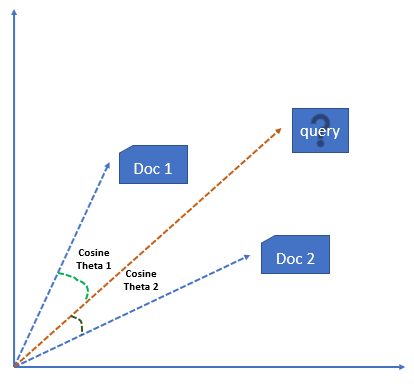

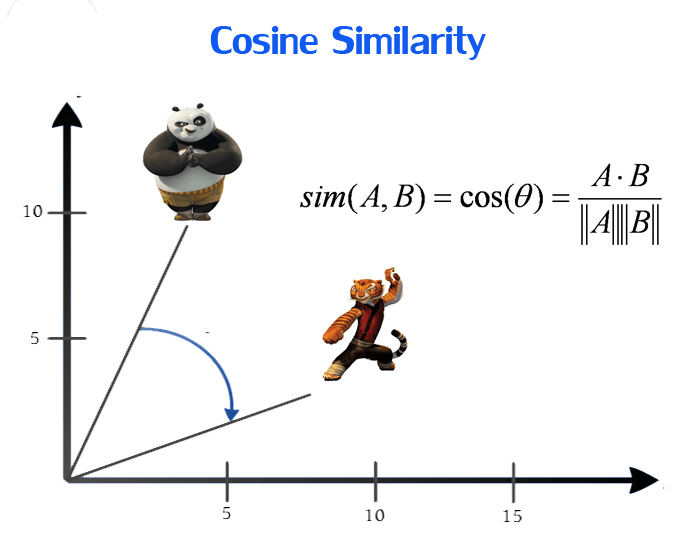

In [34]:
cosine_similarities = linear_kernel(tfidf_matrix, tfidf_matrix)

In [35]:
def recomendation(idx,no_of_news_article):
    #get similarity values with other articles
    similarity_score = list(enumerate(cosine_similarities[idx]))
    similarity_score = sorted(similarity_score, key=lambda x: x[1], reverse=True)
    # Get the scores of the n most similar news articles. Ignore the first movie.
    similarity_score = similarity_score[1:no_of_news_article+1]
    
    print("Article Read -- " + ds['title'].iloc[idx] +" link --"+ ds['link'].iloc[idx])
    print(" ---------------------------------------------------------- ")
    news_indices = [i[0] for i in similarity_score]
    for i in range(len(news_indices)):
        print("Recomendation "+ str(i+1)+" --- " +str(news_indices[i])+"(IDX)  "+str(ds['date'].iloc[news_indices[i]])+" : "+
              ds['title'].iloc[news_indices[i]] +" || Link --"+ ds['link'].iloc[news_indices[i]] +" score -- "+ str(similarity_score[i][1]))
        print()

#Test 1 - when min_df=0.2 shape 1496 rows × 31 columns

In [36]:
idx=3  
min_df=0.2 #shape 1496 rows × 31 columns
no_of_news_article=10
recomendation(idx,no_of_news_article)

Article Read -- Groww, an investment app for millennials in India, raises $30M led by YC Continuity – TechCrunch link --http://techcrunch.com/2020/09/09/groww-an-investment-app-for-millennials-in-india-raises-30m-led-by-yc-continuity/
 ---------------------------------------------------------- 
Recomendation 1 --- 176(IDX)  2020-09-02 00:00:00 : 3one4 Capital launches $100M fund to back early-stage startups in India – TechCrunch || Link --http://techcrunch.com/2020/09/02/3one4-capital-launches-100m-fund-to-back-early-stage-startups-in-india/ score -- 0.05712325226508238

Recomendation 2 --- 9(IDX)  2020-09-07 00:00:00 : Silver Lake leads $500 million investment round in Indian online learning giant Byju’s – TechCrunch || Link --http://techcrunch.com/2020/09/07/silver-lake-leads-500-million-round-in-indias-byjus/ score -- 0.05012420506583725

Recomendation 3 --- 7(IDX)  2020-09-15 00:00:00 : Virtual events platform Airmeet raises $12M – TechCrunch || Link --http://techcrunch.com/2020/09

#Test 2 - when min_df=0.1 shape 1496 rows × 144 columns

In [37]:
idx=3   
min_df=0.1  #shape 1496 rows × 144 columns
no_of_news_article=10
recomendation(idx,no_of_news_article)

Article Read -- Groww, an investment app for millennials in India, raises $30M led by YC Continuity – TechCrunch link --http://techcrunch.com/2020/09/09/groww-an-investment-app-for-millennials-in-india-raises-30m-led-by-yc-continuity/
 ---------------------------------------------------------- 
Recomendation 1 --- 176(IDX)  2020-09-02 00:00:00 : 3one4 Capital launches $100M fund to back early-stage startups in India – TechCrunch || Link --http://techcrunch.com/2020/09/02/3one4-capital-launches-100m-fund-to-back-early-stage-startups-in-india/ score -- 0.05712325226508238

Recomendation 2 --- 9(IDX)  2020-09-07 00:00:00 : Silver Lake leads $500 million investment round in Indian online learning giant Byju’s – TechCrunch || Link --http://techcrunch.com/2020/09/07/silver-lake-leads-500-million-round-in-indias-byjus/ score -- 0.05012420506583725

Recomendation 3 --- 7(IDX)  2020-09-15 00:00:00 : Virtual events platform Airmeet raises $12M – TechCrunch || Link --http://techcrunch.com/2020/09

So When the size of the corpous is very large the similarity score decreases but predicitions are much better. And the score decreses because of regulersation there for min_idf - 0.0 was better in this case.